# Delivery Time

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time (5).csv


In [ ]:
data=pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


**EDA and Data Visualization**

In [ ]:
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='Delivery Time', ylabel='Density'>

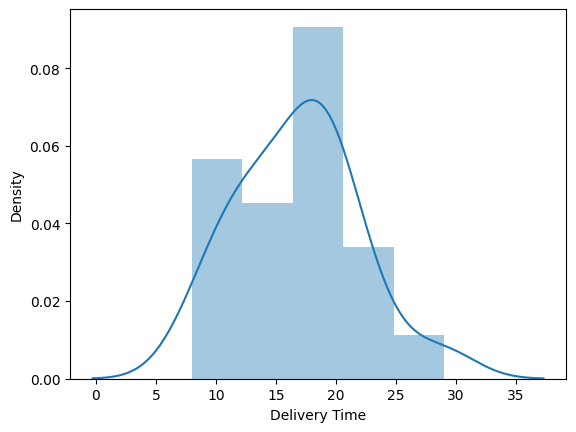

In [ ]:
sns.distplot(data['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

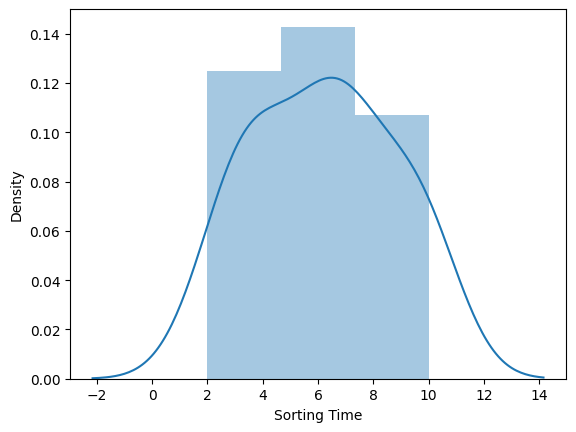

In [ ]:
sns.distplot(data['Sorting Time'])

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

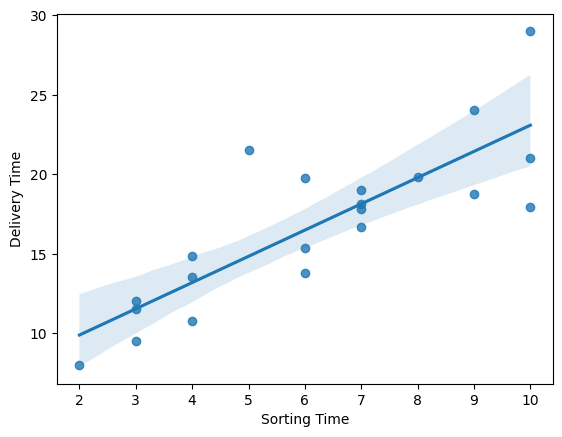

In [ ]:
sns.regplot(x=data['Sorting Time'],y=data['Delivery Time'])

**Correlation**

In [ ]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


**Regression Model**

1. No Transformation

****

In [ ]:
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
DT=data['Delivery Time']
ST=data['Sorting Time']

In [ ]:
model=smf.ols('DT~ST',data=data).fit()

In [ ]:
print(model.params,'\n''\n',model.tvalues,'\n''\n', model.pvalues)

Intercept    6.582734
ST           1.649020
dtype: float64 

 Intercept    3.823349
ST           6.387447
dtype: float64 

 Intercept    0.001147
ST           0.000004
dtype: float64


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           3.98e-06
Time:                        08:48:08   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

****

2. Log Transformation of X(Sorting Time)

In [ ]:
model_2=smf.ols('DT~np.log(ST)',data=data).fit()

In [ ]:
print(model_2.params,'\n''\n',model_2.tvalues,'\n''\n', model_2.pvalues)

Intercept     1.159684
np.log(ST)    9.043413
dtype: float64 

 Intercept     0.472460
np.log(ST)    6.586789
dtype: float64 

 Intercept     0.641980
np.log(ST)    0.000003
dtype: float64


In [ ]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           2.64e-06
Time:                        08:48:08   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3. Log Transformation of Y(Delivery Time)

In [ ]:
model_3=smf.ols('np.log(DT)~ST',data=data).fit()

In [ ]:
print(model_3.params,'\n''\n',model_3.tvalues,'\n''\n', model_3.pvalues)

Intercept    2.121372
ST           0.105552
dtype: float64 

 Intercept    20.601357
ST            6.836088
dtype: float64 

 Intercept    1.857343e-14
ST           1.592708e-06
dtype: float64


In [ ]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.59e-06
Time:                        08:48:08   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4. Log Tranformation of both X and Y

In [ ]:
model_4=smf.ols('np.log(DT)~np.log(ST)',data=data).fit()

In [ ]:
print(model_4.params,'\n''\n',model_4.tvalues,'\n''\n', model_4.pvalues)

Intercept     1.741987
np.log(ST)    0.597522
dtype: float64 

 Intercept     13.085552
np.log(ST)     8.024484
dtype: float64 

 Intercept     5.921137e-11
np.log(ST)    1.601539e-07
dtype: float64


In [ ]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.60e-07
Time:                        08:48:08   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
np.log(ST)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5. Square Root Transformation of X

In [ ]:
model_5=smf.ols('DT~np.sqrt(ST)',data=data).fit()

In [ ]:
print(model_5.params,'\n''\n',model_5.tvalues,'\n''\n', model_5.pvalues)

Intercept     -2.518837
np.sqrt(ST)    7.936591
dtype: float64 

 Intercept     -0.840911
np.sqrt(ST)    6.592434
dtype: float64 

 Intercept      0.410857
np.sqrt(ST)    0.000003
dtype: float64


In [ ]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           2.61e-06
Time:                        08:48:08   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(ST)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

6. Square Root Transformation of Y

In [ ]:
model_6=smf.ols('np.sqrt(DT)~ST',data=data).fit()

In [ ]:
print(model_6.params,'\n''\n',model_6.tvalues,'\n''\n', model_6.pvalues)

Intercept    2.772731
ST           0.206632
dtype: float64 

 Intercept    13.527452
ST            6.723095
dtype: float64 

 Intercept    3.339366e-11
ST           2.001215e-06
dtype: float64


In [ ]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.sqrt(DT)   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           2.00e-06
Time:                        08:48:08   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7727      0.205     13.527      0.000       2.344       3.202
ST             0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

7. Square Root Transformation of X and Y

In [ ]:
model_7=smf.ols('np.sqrt(DT)~np.sqrt(ST)',data=data).fit()

In [ ]:
print(model_7.params,'\n''\n',model_7.tvalues,'\n''\n', model_7.pvalues)

Intercept      1.613479
np.sqrt(ST)    1.002217
dtype: float64 

 Intercept      4.628248
np.sqrt(ST)    7.152817
dtype: float64 

 Intercept      1.833621e-04
np.sqrt(ST)    8.475706e-07
dtype: float64


In [ ]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.sqrt(DT)   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           8.48e-07
Time:                        08:48:09   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(ST)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

8. Exponential Transformation of X

In [ ]:
model_8=smf.ols('DT~np.exp(ST)',data=data).fit()

In [ ]:
print(model_8.params,'\n''\n',model_8.tvalues,'\n''\n', model_8.pvalues)

Intercept     15.083578
np.exp(ST)     0.000393
dtype: float64 

 Intercept     14.406456
np.exp(ST)     3.277108
dtype: float64 

 Intercept     1.117304e-11
np.exp(ST)    3.964511e-03
dtype: float64


In [ ]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Thu, 29 Jun 2023   Prob (F-statistic):            0.00396
Time:                        08:48:09   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(ST)     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

9. Exponential Transformation of Y

In [ ]:
model_9=smf.ols('np.exp(DT)~ST',data=data).fit()

In [ ]:
print(model_9.params,'\n''\n',model_9.tvalues,'\n''\n', model_9.pvalues)

Intercept   -5.324298e+11
ST           1.164897e+11
dtype: float64 

 Intercept   -1.099153
ST           1.603789
dtype: float64 

 Intercept    0.285434
ST           0.125254
dtype: float64


In [ ]:
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.exp(DT)   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     2.572
Date:                Thu, 29 Jun 2023   Prob (F-statistic):              0.125
Time:                        08:48:09   Log-Likelihood:                -604.98
No. Observations:                  21   AIC:                             1214.
Df Residuals:                      19   BIC:                             1216.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.324e+11   4.84e+11     -1.099      0.285   -1.55e+12    4.81e+11
ST          1.165e+11   7.26e+10      1.604      0.125   -3.55e+10    2.69e+11
==============================================================================
Omnibus:                       44.249   Durbin-Watson:                   2.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.022
Skew:                           3.442   Prob(JB):                     1.47e-36
Kurtosis:                      14.883   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

10. Exponential Transformation of both X and Y.

In [ ]:
model_10=smf.ols('np.exp(DT)~np.exp(ST)',data=data).fit()

In [ ]:
print(model_10.params,'\n''\n',model_10.tvalues,'\n''\n', model_10.pvalues)

Intercept    -6.243560e+10
np.exp(ST)    5.779920e+07
dtype: float64 

 Intercept    -0.330955
np.exp(ST)    2.675152
dtype: float64 

 Intercept     0.744301
np.exp(ST)    0.014970
dtype: float64


In [ ]:
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.exp(DT)   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     7.156
Date:                Thu, 29 Jun 2023   Prob (F-statistic):             0.0150
Time:                        08:48:09   Log-Likelihood:                -602.95
No. Observations:                  21   AIC:                             1210.
Df Residuals:                      19   BIC:                             1212.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.244e+10   1.89e+11     -0.331      0.744   -4.57e+11    3.32e+11
np.exp(ST)   5.78e+07   2.16e+07      2.675      0.015    1.26e+07    1.03e+08
==============================================================================
Omnibus:                       29.198   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.647
Skew:                           2.162   Prob(JB):                     4.56e-16
Kurtosis:                      10.877   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**CONCLUSION:**

We will use **model-4** (Log Transformation of both X and Y), as it has the best R-Squared value **(77.2%)**

P-value (**1.601539e-07**) is very much less than 0.05, thus the model is accepted.

Beta Co-efficient =  0.597522
Therefore every unit increase in Sorting Time, we shall see  0.597522 increase in Delivery Time.


# Salary Hike

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
data=pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data=data.rename({'Salary':'Salary Hike','YearsExperience':'Years of Experience'},axis=1)

EDA and Data Visualization

In [ ]:
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='Salary Hike', ylabel='Density'>

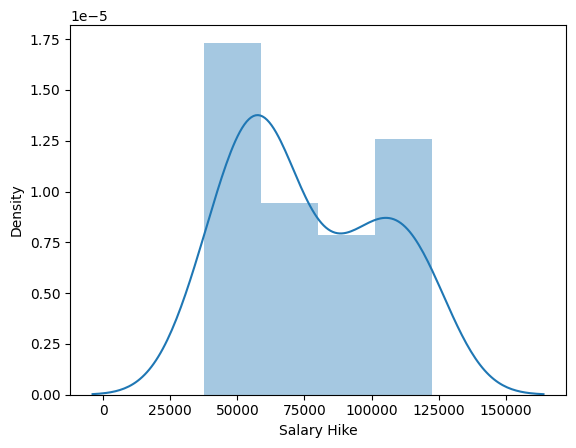

In [ ]:
sns.distplot(data['Salary Hike'])

<Axes: xlabel='Years of Experience', ylabel='Density'>

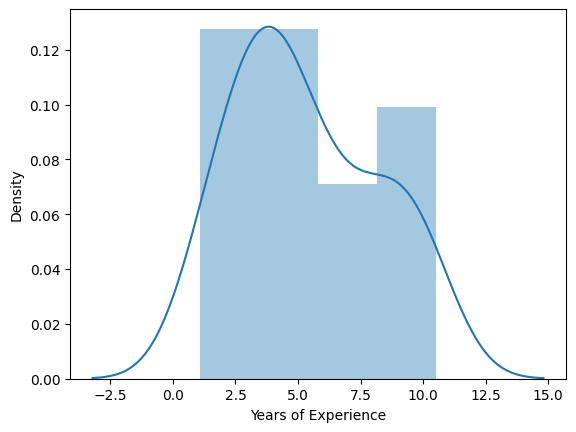

In [ ]:
sns.distplot(data['Years of Experience'])

<Axes: xlabel='Years of Experience', ylabel='Salary Hike'>

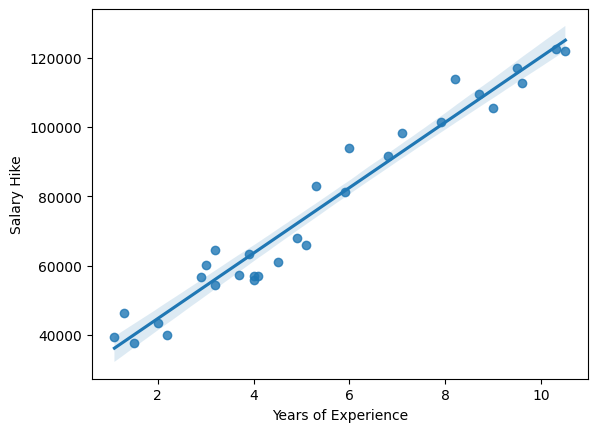

In [ ]:
sns.regplot(x=data['Years of Experience'],y=data['Salary Hike'])

**Correlation**

In [ ]:
data.corr()

,Years of Experience,Salary Hike
Years of Experience,1.000000,0.978242
Salary Hike,0.978242,1.000000


In [ ]:
YOE=data['Years of Experience']
SH=data['Salary Hike']

**Regression Model**

In [ ]:
import statsmodels.formula.api as smf
import numpy as np

1. No Transformation

In [ ]:
model=smf.ols('SH~YOE',data=data).fit()

In [ ]:
print(model.params,'\n''\n',model.tvalues,'\n''\n', model.pvalues)

Intercept    25792.200199
YOE           9449.962321
dtype: float64 

 Intercept    11.346940
YOE          24.950094
dtype: float64 

 Intercept    5.511950e-12
YOE          1.143068e-20
dtype: float64


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SH   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        09:36:05   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YOE         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. Log Transformation of X

In [ ]:
model_2=smf.ols('SH~np.log(YOE)',data=data).fit()

In [ ]:
print(model_2.params,'\n''\n',model_2.tvalues,'\n''\n', model_2.pvalues)

Intercept      14927.97177
np.log(YOE)    40581.98796
dtype: float64 

 Intercept       2.895135
np.log(YOE)    12.791989
dtype: float64 

 Intercept      7.268813e-03
np.log(YOE)    3.250155e-13
dtype: float64


In [ ]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SH   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           3.25e-13
Time:                        09:38:10   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YOE)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3. Log Transformation of Y

In [ ]:
model_3=smf.ols('np.log(SH)~YOE',data=data).fit()

In [ ]:
print(model_3.params,'\n''\n',model_3.tvalues,'\n''\n', model_3.pvalues)

Intercept    10.507402
YOE           0.125453
dtype: float64 

 Intercept    273.327166
YOE           19.584833
dtype: float64 

 Intercept    1.604634e-49
YOE          7.027439e-18
dtype: float64


In [ ]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(SH)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           7.03e-18
Time:                        09:40:46   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
YOE            0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4. Log Tranformation of both X and Y

In [ ]:
model_4=smf.ols('np.log(SH)~np.log(YOE)',data=data).fit()

In [ ]:
print(model_4.params,'\n''\n',model_4.tvalues,'\n''\n', model_4.pvalues)

Intercept      10.328043
np.log(YOE)     0.562089
dtype: float64 

 Intercept      184.867959
np.log(YOE)     16.352542
dtype: float64 

 Intercept      9.073132e-45
np.log(YOE)    7.395278e-16
dtype: float64


In [ ]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(SH)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           7.40e-16
Time:                        10:03:18   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YOE)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5. Square Root transformation of X

In [ ]:
model_5=smf.ols('SH~np.sqrt(YOE)',data=data).fit()

In [ ]:
print(model_5.params,'\n''\n',model_5.tvalues,'\n''\n', model_5.pvalues)

Intercept      -16055.769117
np.sqrt(YOE)    41500.680583
dtype: float64 

 Intercept       -3.262308
np.sqrt(YOE)    19.437148
dtype: float64 

 Intercept       2.906965e-03
np.sqrt(YOE)    8.565358e-18
dtype: float64


In [ ]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SH   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           8.57e-18
Time:                        10:05:17   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YOE)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

6. Square root Trasformation of Y

In [ ]:
model_6=smf.ols('np.sqrt(SH)~YOE',data=data).fit()

In [ ]:
print(model_6.params,'\n''\n',model_6.tvalues,'\n''\n', model_6.pvalues)

Intercept    180.700221
YOE           17.056532
dtype: float64 

 Intercept    40.646251
YOE          23.025247
dtype: float64 

 Intercept    1.920194e-26
YOE          9.782891e-20
dtype: float64


In [ ]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.sqrt(SH)   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           9.78e-20
Time:                        10:07:42   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    180.7002      4.446     40.646      0.000     171.594     189.807
YOE           17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

7. Square Root Transformation of both X and Y

In [ ]:
model_7=smf.ols('np.sqrt(SH)~np.sqrt(YOE)',data=data).fit()

In [ ]:
print(model_7.params,'\n''\n',model_7.tvalues,'\n''\n', model_7.pvalues)

Intercept       103.568031
np.sqrt(YOE)     75.626932
dtype: float64 

 Intercept       12.663496
np.sqrt(YOE)    21.315126
dtype: float64 

 Intercept       4.141645e-13
np.sqrt(YOE)    7.584326e-19
dtype: float64


In [ ]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.sqrt(SH)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           7.58e-19
Time:                        10:09:41   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YOE)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

8. Exponential tranformation of X

In [ ]:
model_8=smf.ols('SH~np.exp(YOE)',data=data).fit()

In [ ]:
print(model_8.params,'\n''\n',model_8.tvalues,'\n''\n', model_8.pvalues)

Intercept      67568.624969
np.exp(YOE)        2.136040
dtype: float64 

 Intercept      16.620427
np.exp(YOE)     5.006889
dtype: float64 

 Intercept      4.888835e-16
np.exp(YOE)    2.721588e-05
dtype: float64


In [ ]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SH   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           2.72e-05
Time:                        10:13:04   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.757e+04   4065.396     16.620      0.000    5.92e+04    7.59e+04
np.exp(YOE)     2.1360      0.427      5.007      0.000       1.262       3.010
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                1.966
Skew:                           0.276   Prob(JB):                        0.374
Kurtosis:                       1.874   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

9. Exponential Transformation of Y

In [ ]:
model_9=smf.ols('np.exp(SH)~YOE',data=data).fit()

In [ ]:
print(model_9.params,'\n''\n',model_9.tvalues,'\n''\n', model_9.pvalues)

Intercept   NaN
YOE         NaN
dtype: float64 

 Intercept   NaN
YOE         NaN
dtype: float64 

 Intercept   NaN
YOE         NaN
dtype: float64


In [ ]:
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.exp(SH)   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 29 Jun 2023   Prob (F-statistic):                nan
Time:                        10:16:21   Log-Likelihood:                    nan
No. Observations:                  30   AIC:                               nan
Df Residuals:                      28   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept         nan        nan        nan        nan         nan         nan
YOE               nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

10. Exponential Transformation of both X and Y

In [ ]:
model_10=smf.ols('np.exp(SH)~np.exp(YOE)',data=data).fit()

In [ ]:
print(model_10.params,'\n''\n',model_10.tvalues,'\n''\n', model_10.pvalues)

Intercept     NaN
np.exp(YOE)   NaN
dtype: float64 

 Intercept     NaN
np.exp(YOE)   NaN
dtype: float64 

 Intercept     NaN
np.exp(YOE)   NaN
dtype: float64


In [ ]:
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.exp(SH)   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 29 Jun 2023   Prob (F-statistic):                nan
Time:                        10:17:59   Log-Likelihood:                    nan
No. Observations:                  30   AIC:                               nan
Df Residuals:                      28   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept          nan        nan        nan        nan         nan         nan
np.exp(YOE)        nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

CONCLUSION:**

We will use **model-1** (No Transformation of both X and Y), as it has the best R-Squared value **(95.7%)**

P-value (**1.143068e-20**) is very much less than 0.05, thus the model is accepted.

Beta Co-efficient = 9449.962321
Therefore every unit increase in Years of Experience, we shall see   9449.96 increase Salary Hike.
